# Importing Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score , confusion_matrix, classification_report

# Objective

Develop a model that could predict suitable crop based on soil and weather conditions

# Importing the dataset

In [3]:
dataset = pd.read_csv('crop_recommendation_data.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

# EDA (Exploratory Data Analysis)

In [4]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


label column data type is object , so label encoder must be used

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
dataset['label_encoded'] = le.fit_transform(dataset['label'])

In [7]:
print(dataset['label_encoded'].unique())

[20 11  3  9 18 13 14  2 10 19  1 12  7 21 15  0 16 17  4  6  8  5]


In [8]:
print(y)

[20 20 20 ...  5  5  5]


apple        → 0

banana       → 1

blackgram    → 2

chickpea     → 3

coconut      → 4

coffee       → 5

cotton       → 6

grapes       → 7

jute         → 8

kidneybeans  → 9

lentil       → 10

maize        → 11

mango        → 12

mothbeans    → 13

mungbean     → 14

muskmelon    → 15

orange       → 16

papaya       → 17

pigeonpeas   → 18

pomegranate  → 19

rice         → 20

watermelon   → 21


In [9]:
dataset.describe()

,N,P,K,temperature,humidity,ph,rainfall,label_encoded
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655,10.500000
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389,6.345731
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267,0.000000
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686,5.000000
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624,10.500000
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508,16.000000
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117,21.000000


data will have to be normalised

In [10]:
dataset.shape

(2200, 9)

2200 rows and 8 columns

In [11]:
dataset.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0
label_encoded,0


there are no missing values after all

<Axes: >

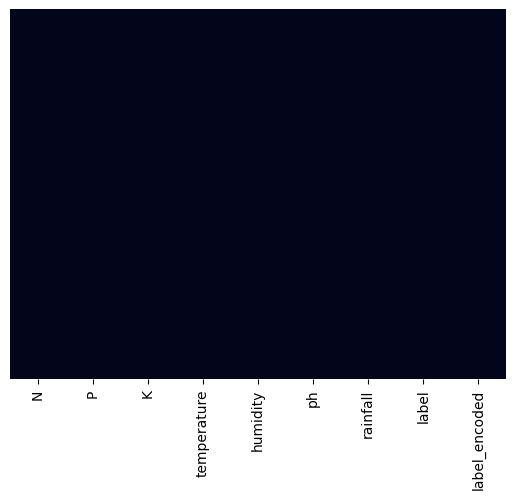

In [12]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

visualisation of null values

# Analyize the target Label

In [13]:
dataset['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [14]:
dataset['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


data is perfectly balanced

# Check correlation of the feature with target -- 'label'

In [15]:
print(dataset.corr(numeric_only=True)['label_encoded'].abs().sort_values(ascending=False))

label_encoded    1.000000
P                0.491006
K                0.346417
humidity         0.193911
temperature      0.113606
rainfall         0.045611
N                0.031130
ph               0.012253
Name: label_encoded, dtype: float64


The correlation with the target ranges from weak to moderate. Nitrogen, ph value, rainfall doesn't seem to have different affect on each crop

Text(0.5, 1.0, 'correlation between variables')

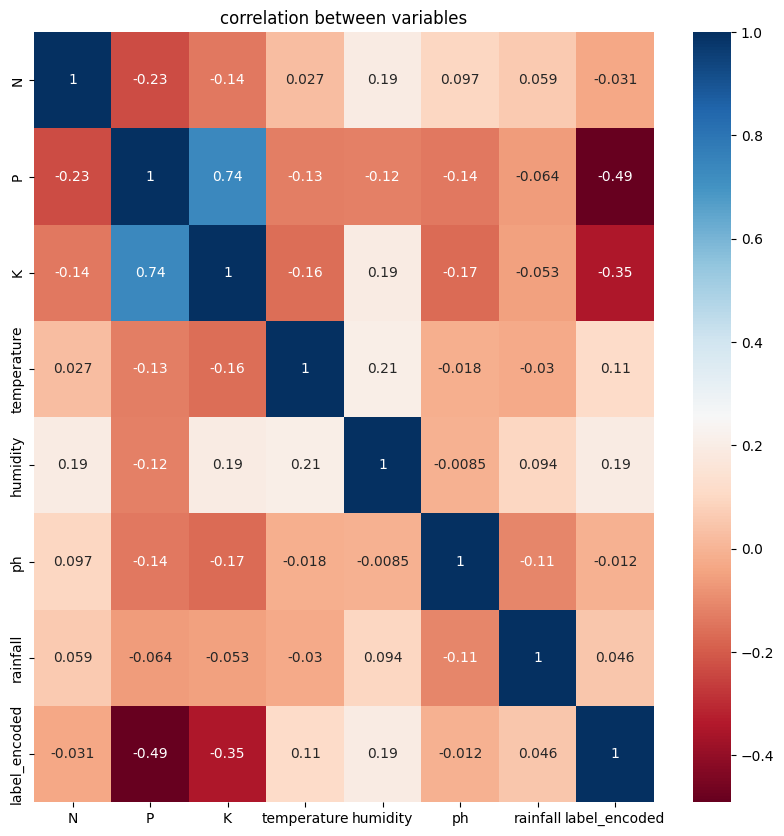

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(numeric_only=True),annot=True,cmap="RdBu")
plt.title('correlation between variables')

# Data Visualization

# Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [18]:
print (X)

[[ 1.0687974  -0.34455075 -0.1016875  ...  0.47266646  0.04330173
   1.8103605 ]
 [ 0.93332887  0.14061552 -0.14118477 ...  0.39705125  0.73487256
   2.24205791]
 [ 0.25598625  0.04964684 -0.08193887 ...  0.48695381  1.77151047
   2.92106603]
 ...
 [ 1.82742114 -0.61745677 -0.35841972 ... -0.19123516 -0.13812031
   1.27141766]
 [ 1.80032743 -0.64777967 -0.27942519 ... -0.86951801  0.37390383
   0.43154519]
 [ 1.44810927 -1.07230015 -0.35841972 ... -0.49802006  0.40109573
   0.68200518]]


# Split the dataset into training set and test set

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [20]:
print(X_train)

[[ 0.85204776 -0.40519653 -0.1609334  ...  0.59894744 -0.2558943
   3.55070122]
 [-0.63810601  0.2012613  -0.61515194 ... -0.35198723  0.72026729
  -0.71055141]
 [-1.31544864  0.23158419 -0.55590604 ... -2.17708837 -0.66411059
  -0.48815971]
 ...
 [ 1.82742114 -1.07230015 -0.31892246 ... -0.91520584 -0.1520575
   0.35263101]
 [-0.31298155 -0.70842545 -0.20043066 ...  0.72396322  0.64060631
   0.08375373]
 [ 0.25598625  0.14061552 -0.2201793  ...  0.34310618 -0.51976974
   1.23804692]]


In [21]:
print(y_train)

[20  2  9 ...  5 19  8]


In [22]:
print(X_test)

[[-0.5839186  -1.13294593 -0.23992793 ...  0.78385635 -0.94233405
  -0.01098483]
 [ 0.17470514  0.41352154 -0.45716288 ... -0.21866686  1.39821363
  -0.70805711]
 [-0.25879414  0.62578179 -0.59540331 ... -0.46969232  0.1675803
  -0.54757114]
 ...
 [-0.77357454  0.50449022 -0.57565467 ... -2.26451818 -1.2327632
  -0.61904786]
 [-1.01741788  0.2012613  -0.45716288 ... -2.28612837 -1.01259643
   0.45122945]
 [-0.50263749  0.07996974 -0.53615741 ...  0.77204962  0.30150417
  -0.82197812]]


In [23]:
print(y_test)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2 18
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10 20 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  8  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6  2 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15 20 14 20 10 15 16 20  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10



---



## Training on Different models

# 1.A Random Forest model

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [25]:
rf_y_pred = rf.predict(X_test)
print(rf_y_pred)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2 18
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10 20 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  8  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6  2 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16  8  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [26]:
score_rf = round(accuracy_score(rf_y_pred,y_test)*100,2)
print(f"The accuracy score achieved using the Random Forest model is: {score_rf:.2f} %")

The accuracy score achieved using the Random Forest model is: 99.55 %


# 2.A Decision Tree Model

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
dt_y_pred = dt.predict(X_test)
print(dt_y_pred)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2 18
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10 20 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  8  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6  2 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16  8  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [29]:
score_dt = round(accuracy_score(dt_y_pred,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_dt:.2f} %")

The accuracy score achieved using the Decision Tree model is : 99.55 %


# 3.A Logistic Regression model

In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [31]:
y_pred_lr = lr.predict(X_test)
print(y_pred_lr)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2  2
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7 20  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10  8 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  5  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 20 16  9  6 13  1 12 20 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6 10 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 13 15 16  8  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [32]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_lr:.2f} %")

The accuracy score achieved using the Decision Tree model is : 97.27 %


# 4. A SVC model

In [33]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [34]:
y_pred_svc = svc.predict(X_test)
print(y_pred_svc)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2  2
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7 20  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10  8 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  5  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6 10 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16  8  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [35]:
score_svc = round(accuracy_score(y_pred_svc,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_svc:.2f} %")

The accuracy score achieved using the Decision Tree model is : 98.41 %


# 5. K Nearest Neighbors Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [37]:
y_pred_knn=knn.predict(X_test)
print(y_pred_knn)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2  2
  9  4 21 12  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10  8 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 19
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  5  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9  8  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 19
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6 10 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16  8  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [38]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_knn:.2f} %")

The accuracy score achieved using the Decision Tree model is : 97.73 %


# 6. A Naive Bayes Model

In [39]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [40]:
y_pred_nb = nb.predict(X_test)
print(y_pred_nb)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2 18
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10  8 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  8  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6  2 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16 20  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [41]:
score_nb = round(accuracy_score(y_pred_nb,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_nb:.2f} %")

The accuracy score achieved using the Decision Tree model is : 99.55 %


# 7.A XGBoost Model

In [42]:
import xgboost as xgb

xgb = xgb.XGBClassifier(random_state=0)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [43]:
xgb_y_pred = xgb.predict(X_test)
print(xgb_y_pred)

[19  2  2  6 15  5 16  4 10 21 18  7  2  7 18 20 21 13 11  5  1 17  2 18
  9  4 21 13  0 21  3 17  3 14  4  9 20 11  2  2 15 15  7  6  0 10 15  3
  7  7  9  5 14 14 18  0 18 19  8  9  7  8  0  0 16 21  6  3  1  0  7  1
 13  3 19 13 15  4  1 21  1 17 15 11 13  5 13 20  3  4 10 14  2  3  2 16
  0 17 11 21  6 21  2 13  7  1  3 14 18  6 10  5  5 18 11  4 10 20 13 20
  0  6 21  2 11 13  3 14 10 13  3  8  9 13  4 18  8  0 12 20  2 16  2 16
 18  7  8  9  7 19 17  7 19 12 19 17  6  0 17  8 12  5 15  2  8  5 20  7
  9 15 21  9 12  6  5 16 13  9  1 14  8 18  4 14  2 19  8 11 12 17 11  3
  4  6  0  0 14  8 14 17 16  9  6 13  1 12 17 17 21 16  6  9 20  4 18  8
  7 20  8  3  8  7  8 12 10  5 21  7 19 15 14  2 19 11  6 16  3  0 15 16
 12  1 13 14  1  8 17 16 19 10 11 10  5 17 18  2 11  7  6  2 11 12 19  2
 21 11  8  4 11  6  3  9  6 14  2  0 11 15  8 14 20 10 15 16 20  8  4  1
  9 13  9 20  3 21  0 19  6  9 19 18 10  1  7 21 20  8  5  3  5 19  9  5
  1 17  4 16  5 10  8 12 20 13 19  5 15 16 18 10 10

In [44]:
score_xgb = round(accuracy_score(xgb_y_pred,y_test)*100,2)
print(f"The accuracy score achieved using the Decision Tree model is : {score_xgb:.2f} %")

The accuracy score achieved using the Decision Tree model is : 99.32 %


# Summary of scores

In [45]:
scores = [score_lr,score_nb,score_svc,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

for i in range(len(algorithms)):
  print(f"The accuracy score achieved using the {algorithms[i]} is : {scores[i]:.2f}%")

The accuracy score achieved using the Logistic Regression is : 97.27%
The accuracy score achieved using the Naive Bayes is : 99.55%
The accuracy score achieved using the Support Vector Machine is : 98.41%
The accuracy score achieved using the K-Nearest Neighbors is : 97.73%
The accuracy score achieved using the Decision Tree is : 99.55%
The accuracy score achieved using the Random Forest is : 99.55%
The accuracy score achieved using the XGBoost is : 99.32%


# A comparison of the accuracy of the seven models

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

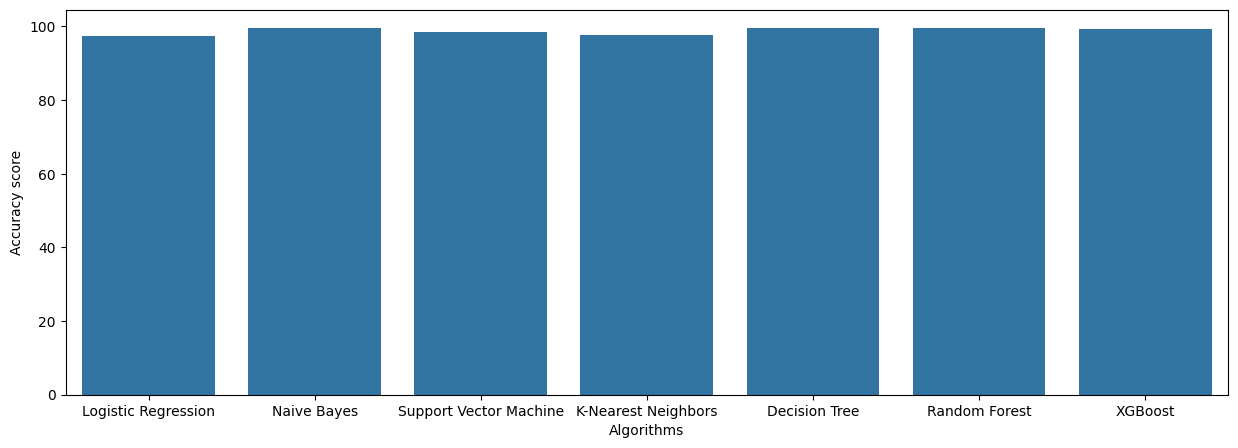

In [46]:
plt.figure(figsize=(15,5))
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

# Evaluation of Naive bayes Model

# Confusion Matrix

In [47]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette

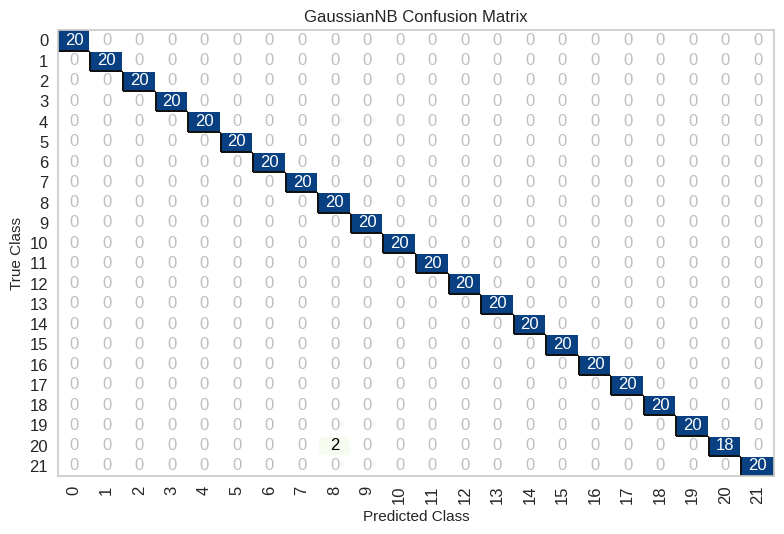

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [48]:
nb_cm = ConfusionMatrix(nb, cmap='GnBu')
nb_cm.fit(X_train,y_train)
nb_cm.score(X_test,y_test)
nb_cm.show()

# Classification Report

In [49]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

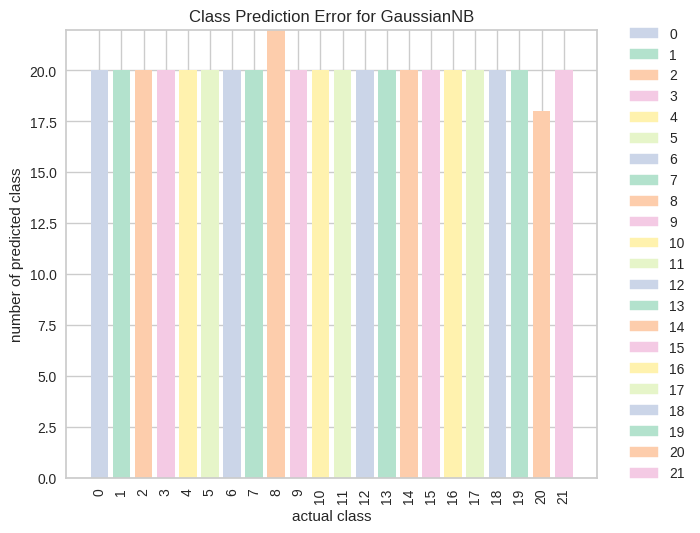

<Axes: title={'center': 'Class Prediction Error for GaussianNB'}, xlabel='actual class', ylabel='number of predicted class'>

In [50]:
visualizer = ClassPredictionError(nb)

set_palette('pastel')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

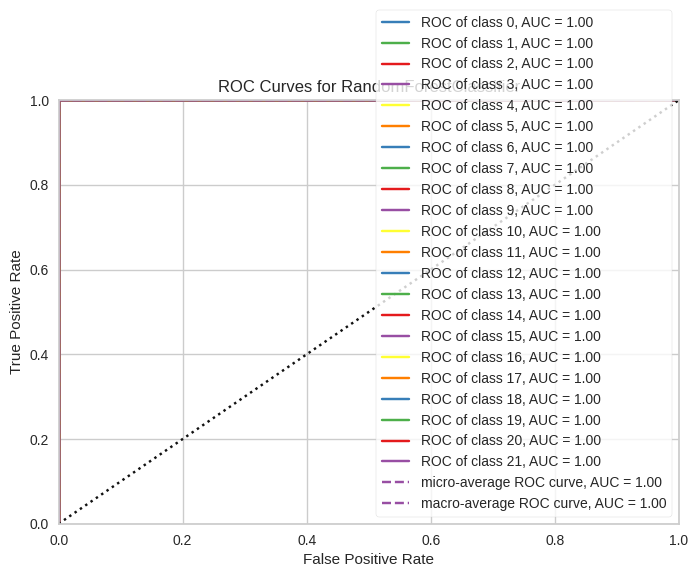

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [51]:
visualizer = ROCAUC(rf)

set_palette('bold')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

# Making a predictive system

In [56]:
input_data = (94,53,40,20.27774362,82.89408619,5.718627177999999,241.9741949)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = sc.transform(input_data_reshaped)

prediction = nb.predict(scaled_input)
print(prediction)

[20]


# Saving the trained model

In [66]:
import pickle
import joblib

In [69]:
pickle.dump(nb, open('Crop_recommendation.sav', 'wb'))
pickle.dump(sc,open('Scaler(CR).sav','wb'))
joblib.dump(le, "label_encoder(CR).joblib")

['label_encoder(CR).joblib']

In [70]:
#loading the saved model
loaded_model = pickle.load(open('Crop_recommendation.sav','rb'))
loaded_scaler = pickle.load(open('Scaler(CR).sav','rb'))
loaded_le = joblib.load("label_encoder(CR).joblib")

In [72]:
input_data = (8	,28,37,23.88404783	,86.20613842	,6.082571701	,108.3121789)

# changing the input_data to numpy array and reshaping
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

scaled_input = loaded_scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(scaled_input)
prediction_name = loaded_le.inverse_transform(prediction)
print(prediction_name)

['pomegranate']


apple        → 0

banana       → 1

blackgram    → 2

chickpea     → 3

coconut      → 4

coffee       → 5

cotton       → 6

grapes       → 7

jute         → 8

kidneybeans  → 9

lentil       → 10

maize        → 11

mango        → 12

mothbeans    → 13

mungbean     → 14

muskmelon    → 15

orange       → 16

papaya       → 17

pigeonpeas   → 18

pomegranate  → 19

rice         → 20

watermelon   → 21
